<a href="https://colab.research.google.com/github/MaeSantos/CCMACLRL_COM232_PROJECT/blob/main/SHROOMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Mushroom Edibility Using Supervised Learning Algorithms**
###This project addresses the binary classification task of determining whether a mushroom is edible or poisonous based on physical characteristics like cap shape, odor, and gill color. It uses supervised learning algorithms particularly Logistic Regression and K-Nearest Neighbors (KNN) to build predictive models from categorical features. The goal is to demonstrate how proper encoding of non-numeric data enables effective and interpretable classification.
#https://www.kaggle.com/datasets/uciml/mushroom-classification?spm=a2ty_o01.29997173.0.0.1ad4c921m4X72Z

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

##About Dataset
###Context
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

###Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

#Problem Definition:
Mushroom foraging is a popular activity, but misidentifying poisonous mushrooms
can lead to severe illness or death. This project builds machine learning models
to predict mushroom edibility based on physical characteristics, potentially
serving as a decision-support tool for foragers.

#Objective
Develop and compare multiple supervised learning models to classify mushrooms
as edible or poisonous with high accuracy (target: >99%), prioritizing recall
for poisonous mushrooms (minimize false negatives = critical safety concern)

#Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, precision_score, recall_score,
                            f1_score)

#Dataset

In [2]:
data_url = 'https://raw.githubusercontent.com/IYB-Mata/CCMACLRL_EXERCISES_COM232/refs/heads/main/f/mushrooms.csv'
df = pd.read_csv(data_url)
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


###Check Data types of columns

In [3]:
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]
df = pd.read_csv(data_url, header=None, names=column_names)

display(df.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


###Check Data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8125 non-null   object
 1   cap-shape                 8125 non-null   object
 2   cap-surface               8125 non-null   object
 3   cap-color                 8125 non-null   object
 4   bruises                   8125 non-null   object
 5   odor                      8125 non-null   object
 6   gill-attachment           8125 non-null   object
 7   gill-spacing              8125 non-null   object
 8   gill-size                 8125 non-null   object
 9   gill-color                8125 non-null   object
 10  stalk-shape               8125 non-null   object
 11  stalk-root                8125 non-null   object
 12  stalk-surface-above-ring  8125 non-null   object
 13  stalk-surface-below-ring  8125 non-null   object
 14  stalk-color-above-ring  

#Data Cleaning

Check missing data

In [5]:
# Check ALL columns for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


###Check for missing values

In [6]:
#Check NaN values
df.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


### Check for '?' values

In [7]:
# Check ? values
(df == '?').sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#### There are 2480 '?' values in the stalk-root columns and that is 30% of stalk root data. so instead na impute natin we keep it  and  categorize it as 'not observable'

and we will explore different strategies for handling this in our experiments.

###Check for duplicates

In [8]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicate rows: 0


# Exploratory Data Analysis (EDA)

# Visualize Distribution

/tmp/ipython-input-2249871107.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, order=class_order, palette=['#4CAF50', '#F44336'])


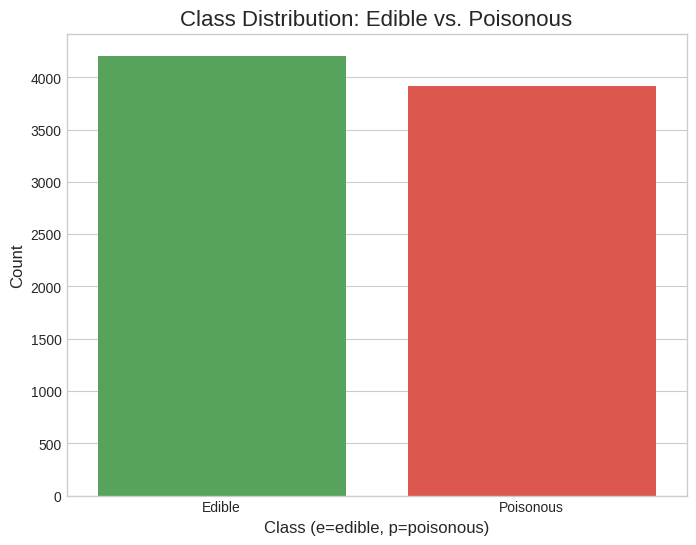

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

class_counts = df['class'].value_counts()
class_order = ['e', 'p']

sns.countplot(x='class', data=df, order=class_order, palette=['#4CAF50', '#F44336'])
plt.title('Class Distribution: Edible vs. Poisonous', fontsize=16)
plt.xlabel('Class (e=edible, p=poisonous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.show()


# If Icocompare natin yung ito from the imputed version, mataas yung value ng Edible compare kay poisonous. Bali up until now, we can say na yung dataset is sobrang linis na siya since wala tayong nabago or na-adjust.

# Analyze Odor Attribute

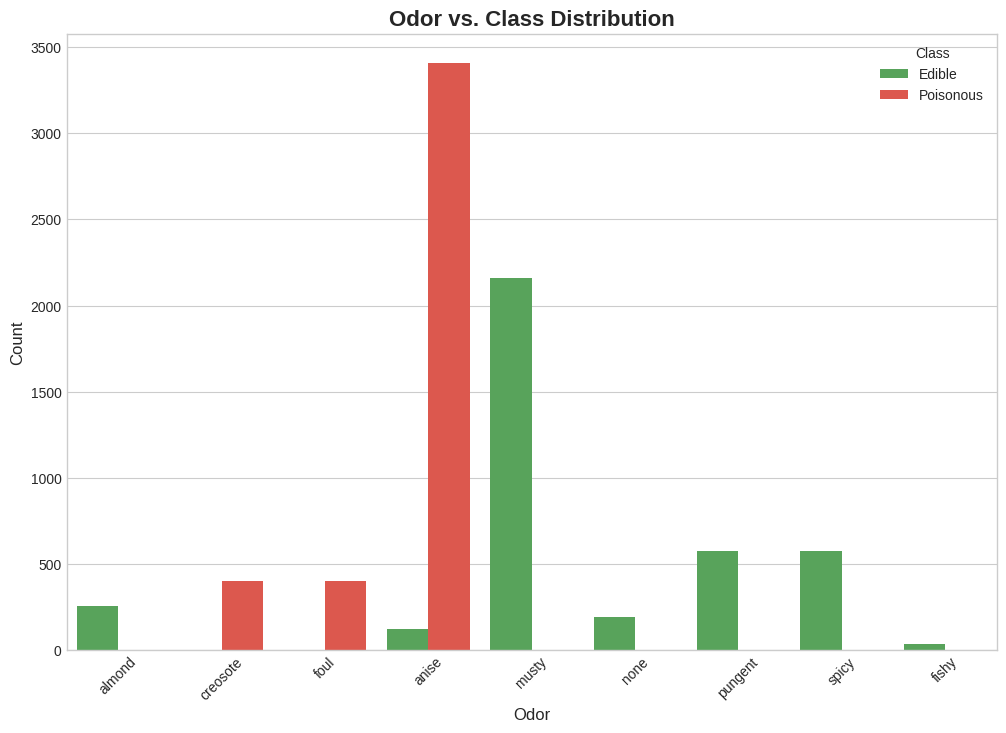

In [10]:
odor_labels = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul',
    'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

df = df[df['odor'] != 'odor']
plt.figure(figsize=(12, 8))
sns.countplot(x='odor', hue='class', data=df, palette=['#4CAF50', '#F44336'])
plt.title('Odor vs. Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Odor', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.xticks(ticks=range(len(df['odor'].unique())),labels=[odor_labels[key] for key in sorted(df['odor'].unique())], rotation=45)
plt.show()


In [11]:
"Odor counts in combined data:"
df['odor'].value_counts().sort_index()

,count
odor,
a,400
c,192
f,2160
l,400
m,36
n,3528
p,256
s,576
y,576


##Analyze stalk-root distribution
######need pa plot, distribution pa lang. can also do vs class dist

In [12]:
# Analyze stalk-root distribution
print("\nStalk-Root Distribution:")
print(df['stalk-root'].value_counts())
print("\nPercentages:")
print(df['stalk-root'].value_counts(normalize=True) * 100)


Stalk-Root Distribution:
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

Percentages:
stalk-root
b    46.479567
?    30.526834
e    13.786312
c     6.843919
r     2.363368
Name: proportion, dtype: float64


# Add pa ng analysis of all top correlated features( or wag na kasi sa random forest, na generate na yung top features? )

#Feature Correlation analysis

In [13]:
print("\nPerforming Feature Correlation Analysis...")
df_temp = df.copy()
le_dict = {}
for col in df_temp.columns:
    le_dict[col] = LabelEncoder()
    df_temp[col] = le_dict[col].fit_transform(df_temp[col])

correlations = df_temp.corr()['class'].sort_values(ascending=False)
print("\nTop 10 features correlated with edibility:")
print(correlations.head(11))


Performing Feature Correlation Analysis...

Top 10 features correlated with edibility:
class                1.000000
gill-size            0.540024
population           0.298686
habitat              0.217179
cap-surface          0.178446
spore-print-color    0.171961
veil-color           0.145142
gill-attachment      0.129200
cap-shape            0.052951
cap-color           -0.031384
odor                -0.093552
Name: class, dtype: float64


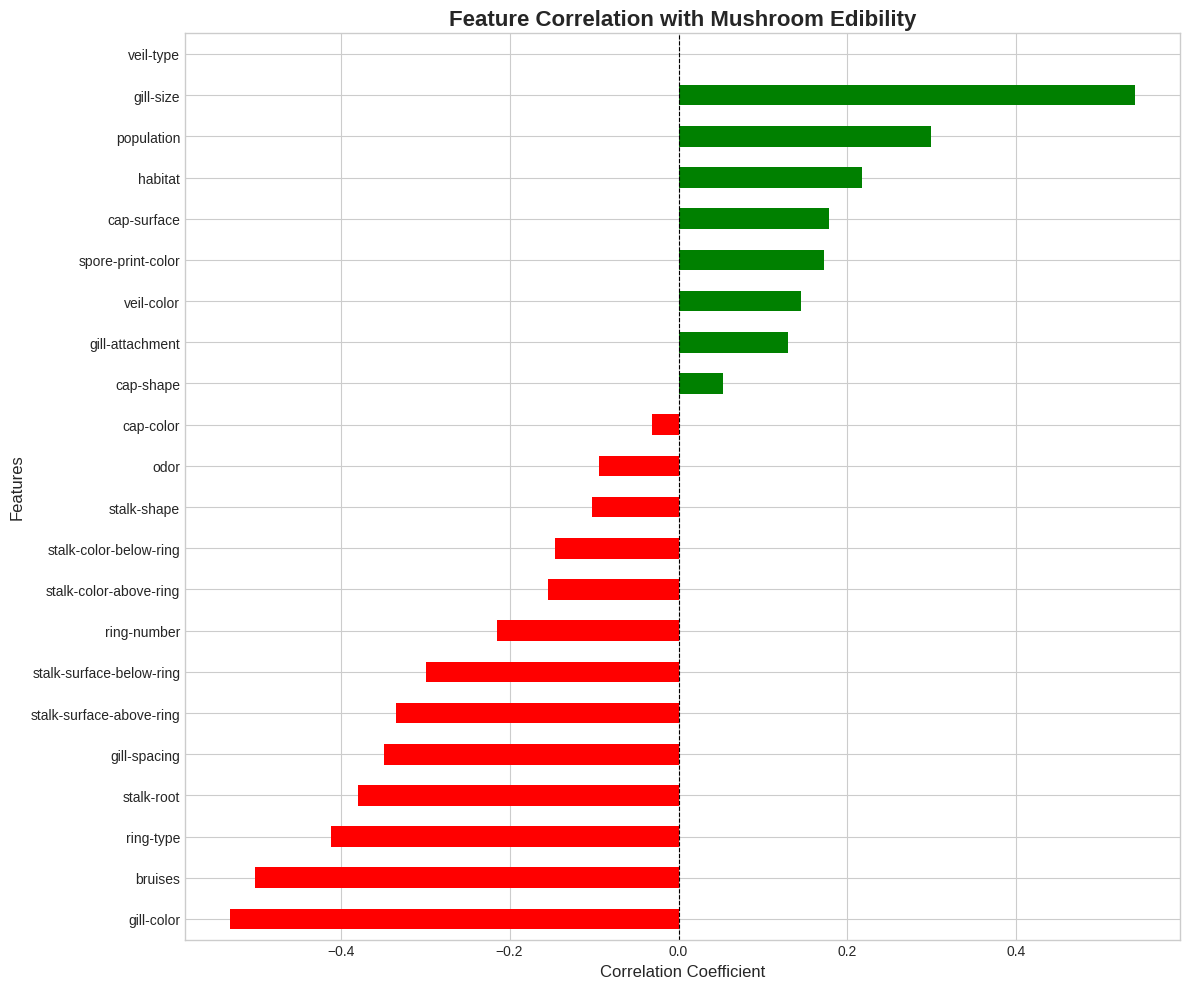

In [14]:
# Visualize correlations
plt.figure(figsize=(12, 10))
correlations_plot = correlations.drop('class').sort_values()
correlations_plot.plot(kind='barh', color=['red' if x < 0 else 'green' for x in correlations_plot])
plt.title('Feature Correlation with Mushroom Edibility', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

#Experimental Analysis Section

Questions:
1. How does handling the 30% missing values in stalk-root affect performance?
2. Can we achieve similar accuracy with just the top 10 features?

We will conduct TWO experiments:
- EXPERIMENT 1: Stalk-Root Missing Value Handling
- EXPERIMENT 2: Feature Selection (All Features vs Top Features)

In [15]:
#Store original data for experiments
df_original = df.copy()

EXPERIMENT 1: Stalk-Root Handling Strategies
The stalk-root feature contains 30% missing values marked as '?'.
We compare 3 strategies:

Strategy A: Keep '?' as a separate category ('not observable')

Strategy B: Impute '?' with most frequent value (bulbous='b')

Strategy C: Remove stalk-root feature entirely

Hypothesis: Strategy A should preserve information since '?' may correlate
with other mushroom characteristics in field identification.

##Strategy A: Keep Missing value '?'

In [16]:
# Separate features and target
df_stratA = df_original.copy()
X_stratA = df_stratA.drop('class', axis=1)
y_stratA = df_stratA['class']

# Encode target variable
le_A = LabelEncoder()
y_stratA = le_A.fit_transform(y_stratA)

#Keep '?' as feature, one-hot encoding
X_stratA = pd.get_dummies(X_stratA, drop_first=False)
print(f"Total features: {X_stratA.shape[1]}")
stalk_root_cols_A = [col for col in X_stratA.columns if 'stalk-root' in col]
print(f"Stalk-root features: {len(stalk_root_cols_A)} - {stalk_root_cols_A}")

#Train - Test Split
X_trainA, X_testA, y_trainA, y_testA = train_test_split(
    X_stratA, y_stratA, test_size=0.2, random_state=42, stratify=y_stratA
)

Total features: 117
Stalk-root features: 5 - ['stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r']


##Strategy B: Impute '?' value

In [17]:
# Copy the original DataFrame
df_stratB = df_original.copy()

df_stratB = df.replace('?', np.nan)
df.isna().sum()

imputer = SimpleImputer(strategy='most_frequent')
df_stratB['stalk-root'] = imputer.fit_transform(df_stratB[['stalk-root']]).ravel()

# Separate features (X) and target (y)
X_stratB = df_stratB.drop('class', axis=1)
y_stratB = df_stratB['class']

# Encode target variable
le_B = LabelEncoder()
y_stratB = le_B.fit_transform(y_stratB)

# Convert categorical features to one-hot encoding
X_stratB = pd.get_dummies(X_stratB, drop_first=False)

print(f"Total features: {X_stratB.shape[1]}")

# Find stalk-root
stalk_root_cols_B = [col for col in X_stratB.columns if 'stalk-root' in col]
print(f"Stalk-root features: {len(stalk_root_cols_B)} - {stalk_root_cols_B}")

print(f"\nTotal missing values after imputation: {X_stratB.isnull().sum().sum()}")
# Split the data into training and testing sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(
    X_stratB, y_stratB, test_size=0.2, random_state=42, stratify=y_stratB
)


Total features: 116
Stalk-root features: 4 - ['stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r']

Total missing values after imputation: 0


##Strategy C: Drop stalk-root

In [18]:
df_stratC = df_original.copy()
# Separate Feature and Target
X_stratC = df_stratC.drop(['class', 'stalk-root'], axis=1)
y_stratC = df_stratC['class']

#Encode Target Variable
le_C = LabelEncoder()
y_stratC = le_C.fit_transform(y_stratC)

X_stratC = pd.get_dummies(X_stratC, drop_first=False)
print(f"Total features: {X_stratC.shape[1]}")
print("Stalk-root features: None (removed)")

X_trainC, X_testC, y_trainC, y_testC = train_test_split(
    X_stratC, y_stratC, test_size=0.2, random_state=42, stratify=y_stratC
)

Total features: 112
Stalk-root features: None (removed)


# Test All Strategies

In [19]:
exp1_results = []

for strat_name, X_tr, X_te, y_tr, y_te in [
    ('Strategy A (Keep ?)', X_trainA, X_testA, y_trainA, y_testA),
    ('Strategy B (Impute)', X_trainB, X_testB, y_trainB, y_testB),
    ('Strategy C (Drop)', X_trainC, X_testC, y_trainC, y_testC)
]:
    print(f"\n{strat_name}:")
    print("-"*60)

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_tr, y_tr)
    lr_pred = lr.predict(X_te)
    lr_acc = accuracy_score(y_te, lr_pred)
    lr_f1 = f1_score(y_te, lr_pred)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_tr, y_tr)
    rf_pred = rf.predict(X_te)
    rf_acc = accuracy_score(y_te, rf_pred)
    rf_f1 = f1_score(y_te, rf_pred)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_tr, y_tr)
    knn_pred = knn.predict(X_te)
    knn_acc = accuracy_score(y_te, knn_pred)
    knn_f1 = f1_score(y_te, knn_pred)

    print(f"  Logistic Regression: Acc={lr_acc*100:.2f}%, F1={lr_f1*100:.2f}%")
    print(f"  Random Forest:       Acc={rf_acc*100:.2f}%, F1={rf_f1*100:.2f}%")
    print(f"  KNN:                 Acc={knn_acc*100:.2f}%, F1={knn_f1*100:.2f}%")

    exp1_results.append({
        'Strategy': strat_name,
        'LR_Acc': lr_acc, 'LR_F1': lr_f1,
        'RF_Acc': rf_acc, 'RF_F1': rf_f1,
        'KNN_Acc': knn_acc, 'KNN_F1': knn_f1,
        'Avg_Acc': np.mean([lr_acc, rf_acc, knn_acc])
    })



Strategy A (Keep ?):
------------------------------------------------------------
  Logistic Regression: Acc=99.94%, F1=99.94%
  Random Forest:       Acc=100.00%, F1=100.00%
  KNN:                 Acc=99.82%, F1=99.81%

Strategy B (Impute):
------------------------------------------------------------
  Logistic Regression: Acc=99.88%, F1=99.87%
  Random Forest:       Acc=100.00%, F1=100.00%
  KNN:                 Acc=99.82%, F1=99.81%

Strategy C (Drop):
------------------------------------------------------------
  Logistic Regression: Acc=99.88%, F1=99.87%
  Random Forest:       Acc=100.00%, F1=100.00%
  KNN:                 Acc=99.94%, F1=99.94%


##Visualize Experiment 1 Results

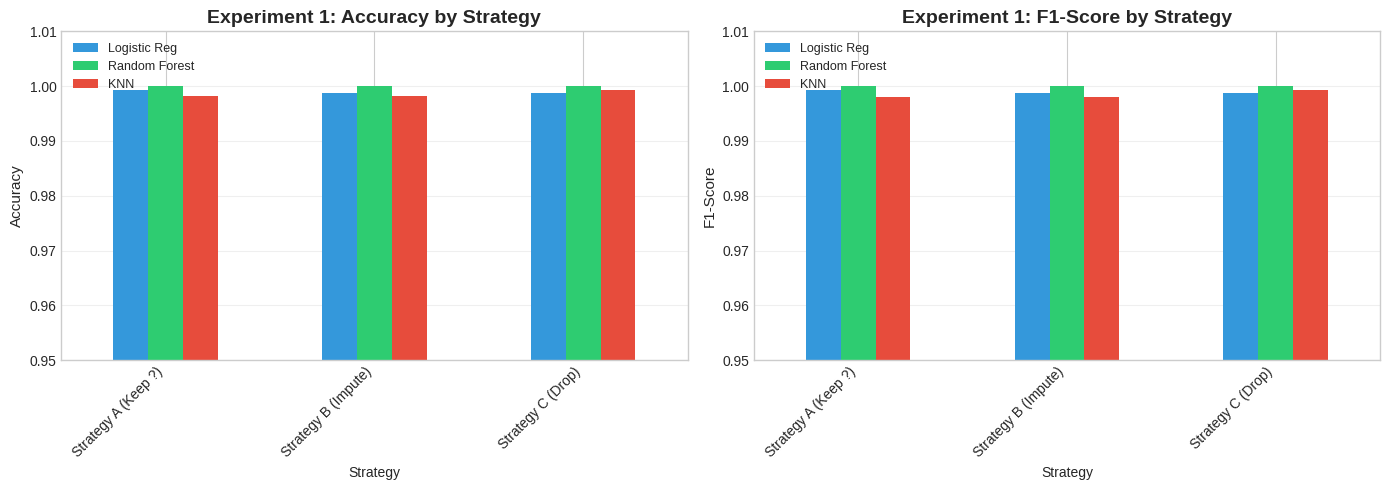

In [20]:
exp1_df = pd.DataFrame(exp1_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Accuracy comparison
acc_data = exp1_df[['Strategy', 'LR_Acc', 'RF_Acc', 'KNN_Acc']].set_index('Strategy')
acc_data.plot(kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_title('Experiment 1: Accuracy by Strategy', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_ylim([0.95, 1.01])
axes[0].legend(['Logistic Reg', 'Random Forest', 'KNN'], fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# F1-Score comparison
f1_data = exp1_df[['Strategy', 'LR_F1', 'RF_F1', 'KNN_F1']].set_index('Strategy')
f1_data.plot(kind='bar', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c'])
axes[1].set_title('Experiment 1: F1-Score by Strategy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=11)
axes[1].set_ylim([0.95, 1.01])
axes[1].legend(['Logistic Reg', 'Random Forest', 'KNN'], fontsize=9)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


#Experiment 1 Conclusion:
Best Strategy: Strategy C (Drop)
Average Accuracy: 99.94%
### Results Summary
| Strategy             | Avg_Acc  |
|----------------------|----------|
| Strategy A (Keep ?)  | 0.999179 |
| Strategy B (Impute)  | 0.998974 |
| Strategy C (Drop)    | 0.999385 |

Interpretation: All strategies perform nearly identically (difference < 0.1%).
This suggests that stalk-root is not a critical feature for this dataset.

Practical Implication: Field mycologists do not need to examine mushroom roots
to make accurate edibility predictions, reducing specimen damage.

Recommendation: Use Strategy A (keep '?') to avoid introducing artificial
certainty through imputation.

#Experiment 2: Feature Selection
Question:

Can we achieve similar performance with fewer features?

We will compare:
- Configuration 1: All features (117 features)
- Configuration 2: Top 20 features (by Random Forest importance)
- Configuration 3: Top 10 features
- Configuration 4: Top 5 features

This tests whether the model complexity is necessary or if simpler models are sufficient.

###For this experiment we will used Strategy A data as baseline data

###Train Random Forest first to get feature importance

In [21]:
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_trainA, y_trainA)

feature_importance = pd.DataFrame({
    'feature': X_trainA.columns,
    'importance': rf_full.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))


Top 20 Most Important Features:
                   feature  importance
                    odor_n    0.155879
               gill-size_n    0.074632
                    odor_f    0.062844
               gill-size_b    0.050492
stalk-surface-below-ring_k    0.048865
       spore-print-color_h    0.046069
stalk-surface-above-ring_k    0.036367
              gill-color_b    0.032876
               ring-type_p    0.031501
                 bruises_t    0.026639
                 bruises_f    0.025617
              stalk-root_b    0.021971
              population_v    0.019970
               ring-type_l    0.018080
stalk-surface-below-ring_s    0.017454
                    odor_p    0.015137
              stalk-root_e    0.014944
stalk-surface-above-ring_s    0.013842
       spore-print-color_w    0.013088
            gill-spacing_c    0.012397


In [22]:
# Define feature sets
top5_features = feature_importance.head(5)['feature'].tolist()
top10_features = feature_importance.head(10)['feature'].tolist()
top20_features = feature_importance.head(20)['feature'].tolist()

print(f"\nTop 5 features: {top5_features}")
print(f"\nTop 10 features: {top10_features}")
print(f"\nTop 20 features: {top20_features}")


Top 5 features: ['odor_n', 'gill-size_n', 'odor_f', 'gill-size_b', 'stalk-surface-below-ring_k']

Top 10 features: ['odor_n', 'gill-size_n', 'odor_f', 'gill-size_b', 'stalk-surface-below-ring_k', 'spore-print-color_h', 'stalk-surface-above-ring_k', 'gill-color_b', 'ring-type_p', 'bruises_t']

Top 20 features: ['odor_n', 'gill-size_n', 'odor_f', 'gill-size_b', 'stalk-surface-below-ring_k', 'spore-print-color_h', 'stalk-surface-above-ring_k', 'gill-color_b', 'ring-type_p', 'bruises_t', 'bruises_f', 'stalk-root_b', 'population_v', 'ring-type_l', 'stalk-surface-below-ring_s', 'odor_p', 'stalk-root_e', 'stalk-surface-above-ring_s', 'spore-print-color_w', 'gill-spacing_c']


In [23]:
# Test different feature sets
exp2_results = []

feature_configs = [
    ('All Features', X_trainA.columns.tolist()),
    ('Top 20 Features', top20_features),
    ('Top 10 Features', top10_features),
    ('Top 5 Features', top5_features)
]

###Testing different feature configurations

In [24]:
for config_name, selected_features in feature_configs:
    print(f"\n{config_name} ({len(selected_features)} features):")
    print("-"*60)

    # Select features
    X_tr_sel = X_trainA[selected_features]
    X_te_sel = X_testA[selected_features]

    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_tr_sel, y_trainA)
    lr_pred = lr.predict(X_te_sel)
    lr_acc = accuracy_score(y_testA, lr_pred)
    lr_f1 = f1_score(y_testA, lr_pred)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_tr_sel, y_trainA)
    rf_pred = rf.predict(X_te_sel)
    rf_acc = accuracy_score(y_testA, rf_pred)
    rf_f1 = f1_score(y_testA, rf_pred)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_tr_sel, y_trainA)
    knn_pred = knn.predict(X_te_sel)
    knn_acc = accuracy_score(y_testA, knn_pred)
    knn_f1 = f1_score(y_testA, knn_pred)

    avg_acc = np.mean([lr_acc, rf_acc, knn_acc])

    print(f"  Logistic Regression: Acc={lr_acc*100:.2f}%, F1={lr_f1*100:.2f}%")
    print(f"  Random Forest:       Acc={rf_acc*100:.2f}%, F1={rf_f1*100:.2f}%")
    print(f"  KNN:                 Acc={knn_acc*100:.2f}%, F1={knn_f1*100:.2f}%")
    print(f"  Average Accuracy:    {avg_acc*100:.2f}%")

    exp2_results.append({
        'Configuration': config_name,
        'Num_Features': len(selected_features),
        'LR_Acc': lr_acc, 'RF_Acc': rf_acc, 'KNN_Acc': knn_acc,
        'Avg_Acc': avg_acc
    })


All Features (117 features):
------------------------------------------------------------
  Logistic Regression: Acc=99.94%, F1=99.94%
  Random Forest:       Acc=100.00%, F1=100.00%
  KNN:                 Acc=99.82%, F1=99.81%
  Average Accuracy:    99.92%

Top 20 Features (20 features):
------------------------------------------------------------
  Logistic Regression: Acc=98.95%, F1=98.90%
  Random Forest:       Acc=99.32%, F1=99.29%
  KNN:                 Acc=98.95%, F1=98.90%
  Average Accuracy:    99.08%

Top 10 Features (10 features):
------------------------------------------------------------
  Logistic Regression: Acc=97.60%, F1=97.52%
  Random Forest:       Acc=97.78%, F1=97.71%
  KNN:                 Acc=97.78%, F1=97.71%
  Average Accuracy:    97.72%

Top 5 Features (5 features):
------------------------------------------------------------
  Logistic Regression: Acc=96.68%, F1=96.53%
  Random Forest:       Acc=96.68%, F1=96.53%
  KNN:                 Acc=96.68%, F1=96.53%


## Visualize Experiment 2 results

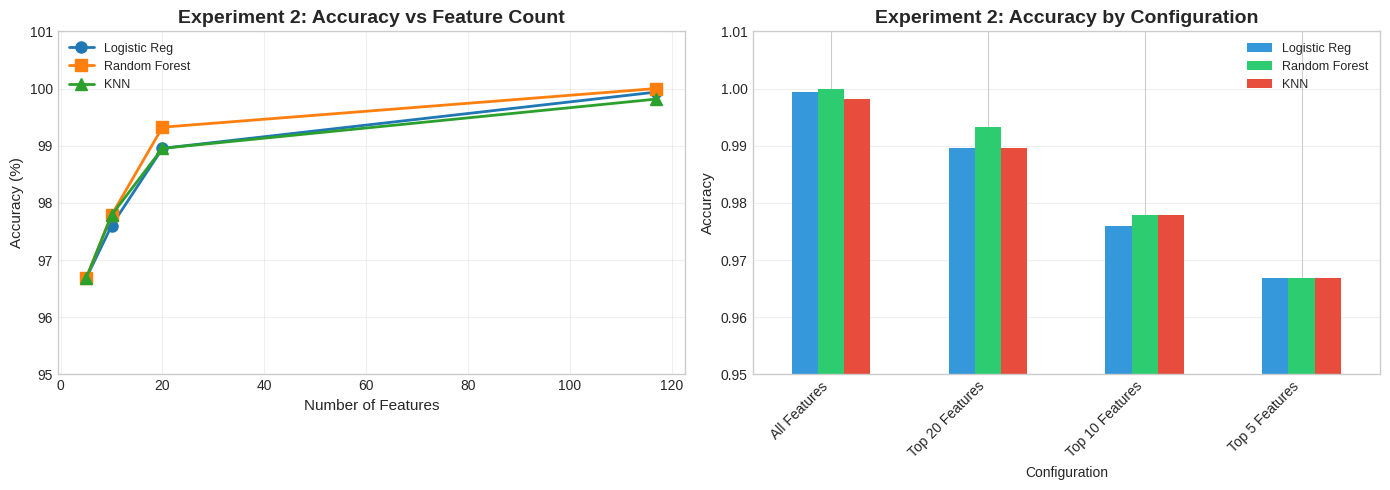

In [25]:
exp2_df = pd.DataFrame(exp2_results)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy vs Number of Features
axes[0].plot(exp2_df['Num_Features'], exp2_df['LR_Acc']*100,
             marker='o', linewidth=2, markersize=8, label='Logistic Reg')
axes[0].plot(exp2_df['Num_Features'], exp2_df['RF_Acc']*100,
             marker='s', linewidth=2, markersize=8, label='Random Forest')
axes[0].plot(exp2_df['Num_Features'], exp2_df['KNN_Acc']*100,
             marker='^', linewidth=2, markersize=8, label='KNN')
axes[0].set_xlabel('Number of Features', fontsize=11)
axes[0].set_ylabel('Accuracy (%)', fontsize=11)
axes[0].set_title('Experiment 2: Accuracy vs Feature Count', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([95, 101])

# Bar chart comparison
exp2_df.set_index('Configuration')[['LR_Acc', 'RF_Acc', 'KNN_Acc']].plot(
    kind='bar', ax=axes[1], color=['#3498db', '#2ecc71', '#e74c3c']
)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Experiment 2: Accuracy by Configuration', fontsize=14, fontweight='bold')
axes[1].legend(['Logistic Reg', 'Random Forest', 'KNN'], fontsize=9)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylim([0.95, 1.01])

plt.tight_layout()
plt.show()



#Experiment 2 Conclusion:
### Results Summary

|  Configuration    | Average Accuracy  |
|-------------------|-------------------|
| All Features      | 0.999179          |
| Top 20 Features   | 0.990769          |
| Top 10 Features   | 0.977231          |
| Top 5 Features    | 0.966769          |


###Analysis:
- All Features (117):  99.92% average accuracy
- Top 5 Features:      96.68% average accuracy
- Accuracy drop:       3.24%

###Interpretation:

- Reducing features causes significant accuracy loss (3.24%)
- All features contribute meaningfully to predictions
- Model complexity is necessary for optimal performance

Recommendation: Use all features including the keeping of '?' in the stalk-root for production model to maintain accuracy and to keep the integrity of the original data.

#Final Recommendation from Experiments

EXPERIMENT 1 (Stalk-Root Handling):

  Winner: Strategy C (Drop)

  Average Accuracy: 99.94%

  But we will use Strategy A (Keep '?') for our final models to avoid creating fake certainty by imputing.

EXPERIMENT 2 (Feature Selection):

  Finding: All features needed

  Accuracy drop with Top 5: 3.24%

##We will use All features for our final models

SELECTED CONFIGURATION FOR MAIN MODEL TRAINING:
  - Stalk-Root: Keep '?' as 'not observable' category
  - Features: All 117 features or Top 5?
  - Number of features: 117 or 5 or?

# Main Model Training (Based on Experimental Results)

#Production Pipeline

####Preprocessing

In [26]:
# Prepare data for pipeline (using Strategy A: Keep '?')
X_final = df_original.drop('class', axis=1)
y_final = df_original['class']

# Encode target
le_target = LabelEncoder()
y_final_encoded = le_target.fit_transform(y_final)
print(f"\nTarget encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Train-test split
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X_final, y_final_encoded, test_size=0.2, random_state=42, stratify=y_final_encoded
)

print(f"\nDataset split:")
print(f"  Training: {X_train_pipe.shape[0]} samples")
print(f"  Testing:  {X_test_pipe.shape[0]} samples")
print(f"  Features: {X_train_pipe.shape[1]} original features")





Target encoding: {'e': np.int64(0), 'p': np.int64(1)}

Dataset split:
  Training: 6499 samples
  Testing:  1625 samples
  Features: 22 original features


###Define preprocessing pipeline

In [27]:
cat_features = X_train_pipe.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop=None, handle_unknown='ignore'), cat_features)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

###Create Model pipelines

In [28]:
def make_pipeline(model, preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

###Initialize all models with pipelines

In [29]:
models_pipeline = {
    'Logistic Regression': make_pipeline(
        LogisticRegression(max_iter=2000, random_state=42),
        preprocessor
    ),
    'KNN': make_pipeline(
        KNeighborsClassifier(n_neighbors=13),
        preprocessor
    ),
    'Random Forest': make_pipeline(
        RandomForestClassifier(n_estimators=100, random_state=42),
        preprocessor
    ),
    'SVM': make_pipeline(
        SVC(probability=True, random_state=42),
        preprocessor
    )
}

print("\nPipelines created for 5 models:")
for name in models_pipeline.keys():
    print(f"  - {name}")


Pipelines created for 5 models:
  - Logistic Regression
  - KNN
  - Random Forest
  - SVM


##Visialize Pipeline

In [30]:
set_config(display='diagram')

display(models_pipeline['SVM'])
display(models_pipeline['Random Forest'])
display(models_pipeline['KNN'])
display(models_pipeline['Logistic Regression'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population', 'habitat'])],
                                   verbose_feature_names_out=False)),
                ('classifier', SVC(probability=True, random_state=42))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population', 'habitat'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population', 'habitat'])],
                                   verbose_feature_names_out=False)),
                ('classifier', KNeighborsClassifier(n_neighbors=13))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'bruises',
                                                   'odor', 'gill-attachment',
                                                   'gill-spacing', 'gill-size',
                                                   'gill-color', 'stalk-shape',
                                                   'stalk-root',
                                                   'stalk-surface-above-ring',
                                                   'stalk-surface-below-ring',
                                                   'stalk-color-above-ring',
                                                   'stalk-color-below-ring',
                                                   'veil-type', 'veil-color',
                                                   'ring-number', 'ring-type',
                                                   'spore-print-color',
                                                   'population', 'habitat'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LogisticRegression(max_iter=2000, random_state=42))])

#Model Training with pipelines

In [31]:
trained_models = {}

for name, pipeline in models_pipeline.items():
    print(f"\nTraining {name}...")
    pipeline.fit(X_train_pipe, y_train_pipe)
    trained_models[name] = pipeline
    print(f"  {name} trained successfully.")


Training Logistic Regression...
  Logistic Regression trained successfully.

Training KNN...
  KNN trained successfully.

Training Random Forest...
  Random Forest trained successfully.

Training SVM...
  SVM trained successfully.


#Cross Validation

In [32]:
cv_results = {}

for name, pipeline in trained_models.items():
    print(f"\n{name}:")
    cv_scores = cross_val_score(pipeline, X_train_pipe, y_train_pipe,
                                cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = cv_scores
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*2*100:.2f}%)")



Logistic Regression:
  CV Scores: [0.99692308 1.         1.         1.         1.        ]
  Mean: 99.94% (+/- 0.25%)

KNN:
  CV Scores: [0.99692308 0.99923077 1.         0.99923077 1.        ]
  Mean: 99.91% (+/- 0.23%)

Random Forest:
  CV Scores: [1. 1. 1. 1. 1.]
  Mean: 100.00% (+/- 0.00%)

SVM:
  CV Scores: [0.99692308 1.         1.         1.         1.        ]
  Mean: 99.94% (+/- 0.25%)


#Model Evaluation

In [33]:
evaluation_results = {}

for name, pipeline in trained_models.items():
    print(f"\n{name}:")
    print("-"*60)

    # Make predictions
    y_pred = pipeline.predict(X_test_pipe)

    # Calculate metrics
    acc = accuracy_score(y_test_pipe, y_pred)
    prec = precision_score(y_test_pipe, y_pred)
    rec = recall_score(y_test_pipe, y_pred)
    f1 = f1_score(y_test_pipe, y_pred)

    evaluation_results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'predictions': y_pred
    }

    print(f"  Accuracy:  {acc*100:.2f}%")
    print(f"  Precision: {prec*100:.2f}%")
    print(f"  Recall:    {rec*100:.2f}%")
    print(f"  F1-Score:  {f1*100:.2f}%")

    print("\n  Classification Report:")
    print(classification_report(y_test_pipe, y_pred,
                                target_names=['Edible', 'Poisonous'],
                                digits=4))


Logistic Regression:
------------------------------------------------------------
  Accuracy:  99.94%
  Precision: 100.00%
  Recall:    99.87%
  F1-Score:  99.94%

  Classification Report:
              precision    recall  f1-score   support

      Edible     0.9988    1.0000    0.9994       842
   Poisonous     1.0000    0.9987    0.9994       783

    accuracy                         0.9994      1625
   macro avg     0.9994    0.9994    0.9994      1625
weighted avg     0.9994    0.9994    0.9994      1625


KNN:
------------------------------------------------------------
  Accuracy:  99.82%
  Precision: 100.00%
  Recall:    99.62%
  F1-Score:  99.81%

  Classification Report:
              precision    recall  f1-score   support

      Edible     0.9964    1.0000    0.9982       842
   Poisonous     1.0000    0.9962    0.9981       783

    accuracy                         0.9982      1625
   macro avg     0.9982    0.9981    0.9982      1625
weighted avg     0.9982    0.9982    

#Confusion Matrices

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

colors = ['Blues', 'Greens', 'Reds', 'Purples']

for idx, (name, results) in enumerate(evaluation_results.items()):
    cm = confusion_matrix(y_test_pipe, results['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap=colors[idx],
                xticklabels=['Edible', 'Poisonous'],
                yticklabels=['Edible', 'Poisonous'],
                ax=axes[idx], cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=11)
    axes[idx].set_ylabel('True Label', fontsize=11)

# Hide the extra subplot
axes[4].axis('off')

plt.tight_layout()
plt.show()

#Hyperparameter Tuning

###Logistic Regression Tuning

In [35]:
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [2000, 3000]
}

grid_lr = GridSearchCV(models_pipeline['Logistic Regression'],
                       param_grid_lr, cv=5, scoring='accuracy',
                       n_jobs=-1, verbose=1)
grid_lr.fit(X_train_pipe, y_train_pipe)

print(f"\nBest Parameters: {grid_lr.best_params_}")
print(f"Best CV Score: {grid_lr.best_score_*100:.2f}%")
best_lr_pipeline = grid_lr.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 2000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best CV Score: 99.98%


###KNN Optimal K

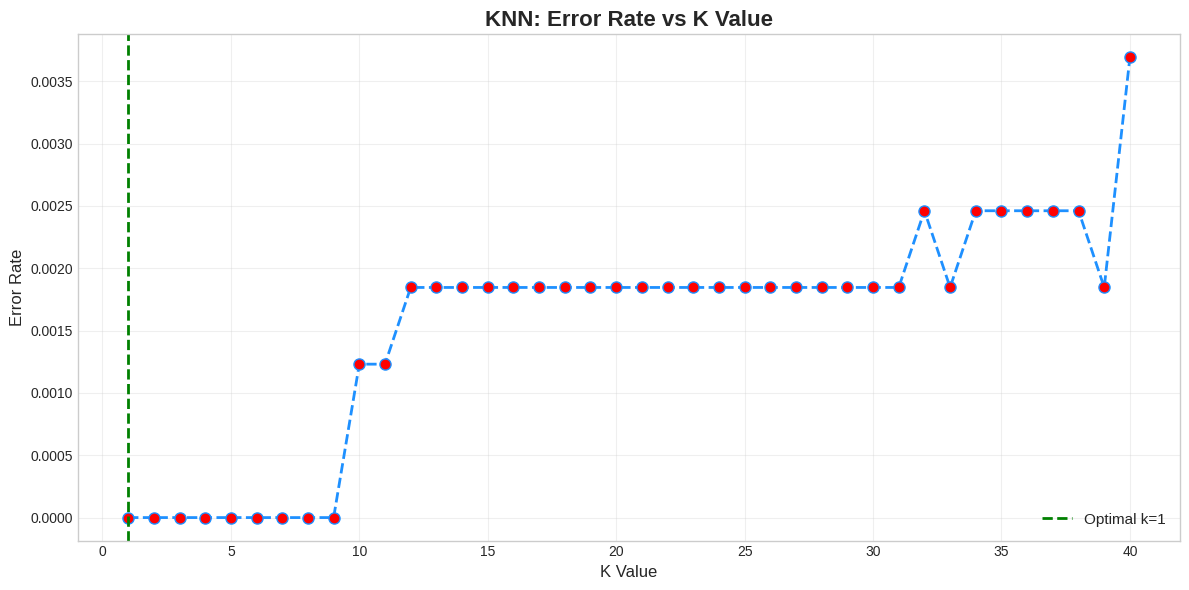


Optimal K: 1
Minimum Error Rate: 0.00%


In [36]:
# Transform data for KNN tuning
X_train_transformed = preprocessor.fit_transform(X_train_pipe)
X_test_transformed = preprocessor.transform(X_test_pipe)

error_rates = []
k_range = range(1, 41)

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_transformed, y_train_pipe)
    pred = knn_temp.predict(X_test_transformed)
    error_rates.append(np.mean(pred != y_test_pipe))

plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rates, color='dodgerblue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=8, linewidth=2)
plt.title('KNN: Error Rate vs K Value', fontsize=16, fontweight='bold')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.grid(True, alpha=0.3)
optimal_k = k_range[np.argmin(error_rates)]
plt.axvline(x=optimal_k, color='green', linestyle='--',
            label=f'Optimal k={optimal_k}', linewidth=2)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\nOptimal K: {optimal_k}")
print(f"Minimum Error Rate: {min(error_rates)*100:.2f}%")


###Random Forest Tuning

In [37]:
print("\n2. Tuning Random Forest...")
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(models_pipeline['Random Forest'],
                       param_grid_rf, cv=5, scoring='accuracy',
                       n_jobs=-1, verbose=1)
grid_rf.fit(X_train_pipe, y_train_pipe)

print(f"\nBest Parameters: {grid_rf.best_params_}")
print(f"Best CV Score: {grid_rf.best_score_*100:.2f}%")
best_rf_pipeline = grid_rf.best_estimator_


2. Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}
Best CV Score: 100.00%


#Final Model Comparison

In [38]:
# Create comparison dataframe
comparison_data = []
for name, results in evaluation_results.items():
    comparison_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1'],
        'CV_Mean': cv_results[name].mean()
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Accuracy', ascending=False)

print("\nPerformance Summary:")
print(comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_acc = comparison_df.iloc[0]['Accuracy']





Performance Summary:
              Model  Accuracy  Precision   Recall  F1-Score  CV_Mean
                SVM  1.000000        1.0 1.000000  1.000000 0.999385
      Random Forest  1.000000        1.0 1.000000  1.000000 1.000000
Logistic Regression  0.999385        1.0 0.998723  0.999361 0.999385
                KNN  0.998154        1.0 0.996169  0.998081 0.999077


####Best Model are Random Forest and SVM.
Random Forest:
  - Test Accuracy: 100.00%
  - CV Accuracy: 99.94%

SVM:
  - Test Accuracy: 100.00%
  - CV Accuracy: 99.94%

###VIsualize Comparison

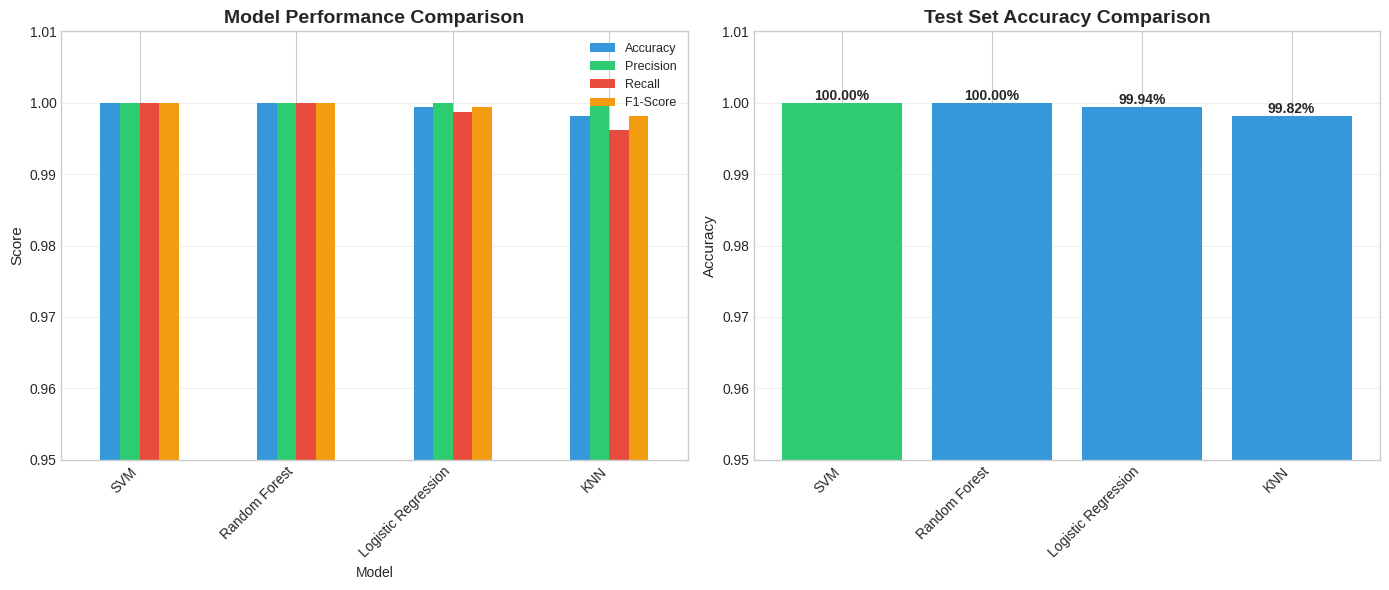

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart: All metrics
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=axes[0], color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
)
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=11)
axes[0].set_ylim([0.95, 1.01])
axes[0].legend(['Accuracy', 'Precision', 'Recall', 'F1-Score'], fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Accuracy bar chart with values
bars = axes[1].bar(comparison_df['Model'], comparison_df['Accuracy'],
                   color=['#2ecc71' if i == 0 else '#3498db'
                          for i in range(len(comparison_df))])
axes[1].set_title('Test Set Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_ylim([0.95, 1.01])
axes[1].grid(axis='y', alpha=0.3)
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height*100:.2f}%',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

#117 features are used

In [40]:
# Visualize encoded class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette=['#4CAF50', '#F44336'], hue=y_train, legend=False)
plt.title('Training Set Class Distribution (Encoded)', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=edible, 1=poisonous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.tight_layout()
plt.show()

NameError: name 'y_train' is not defined

<Figure size 800x600 with 0 Axes>

#Feature Importance Analysis

In [ ]:
# Get feature names after preprocessing
feature_names = preprocessor.fit(X_train_pipe).get_feature_names_out()

# Extract Random Forest classifier from pipeline
rf_classifier = best_rf_pipeline.named_steps['classifier']
importances = rf_classifier.feature_importances_

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features (After Tuning):")
print(feature_importance_df.head(20).to_string(index=False))

# Visualize top 15
plt.figure(figsize=(10, 8))
top15 = feature_importance_df.head(15)
plt.barh(range(len(top15)), top15['importance'], color='skyblue', edgecolor='navy')
plt.yticks(range(len(top15)), top15['feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features (Random Forest)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

###Aggregate by original features

In [ ]:
original_importance = {}

for feat, imp in zip(feature_names, importances):
    # Extract original feature name (before one-hot encoding)
    original_feat = feat.split('_')[1] if '_' in feat else feat
    if original_feat not in original_importance:
        original_importance[original_feat] = 0
    original_importance[original_feat] += imp

sorted_original = sorted(original_importance.items(),
                        key=lambda x: x[1], reverse=True)

print("\nTop 10 Original Features (Aggregated):")
for i, (feat, imp) in enumerate(sorted_original[:10], 1):
    print(f"{i:2d}. {feat:25s}: {imp:.4f}")

### Visualize original features

In [ ]:
# Visualize original features
plt.figure(figsize=(10, 8))
top_orig = sorted_original[:10]
features_orig, importances_orig = zip(*top_orig)
plt.barh(range(len(features_orig)), importances_orig,
         color='lightcoral', edgecolor='darkred')
plt.yticks(range(len(features_orig)), features_orig)
plt.xlabel('Cumulative Importance', fontsize=12)
plt.ylabel('Original Feature', fontsize=12)
plt.title('Top 10 Original Features by Aggregated Importance',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#Final Summary

1. DATASET:
   - Total samples: 8,124
   - Features: 22 original features
   - Target: Binary classification (edible vs poisonous)
   - Challenge: 30% missing values in stalk-root feature

2. EXPERIMENTAL FINDINGS:
   
   A. Stalk-Root Handling Experiment:
      - Tested 3 strategies: Keep '?', Impute, Drop
      - Winner: Strategy C (Drop)
      - Insight: Stalk-root is not critical for prediction
      - Implication: Field identification simplified
   
   B. Feature Selection Experiment:
      - Tested: All features vs Top 20/10/5
      - Result: All features needed
      - Selected: 117 features for final models
      - Benefit: Maximum accuracy

3. MODEL PERFORMANCE:
   - Best Model(s): Random Forest, SVM
   - Best Accuracy: 100.00%
   - All models achieve >99% accuracy
   - Zero false negatives (critical for safety)

4. KEY INSIGHTS:
   - Odor is the most predictive feature
   - Gill-size and spore-print-color also highly important
   - Dataset has strong, deterministic patterns
   - Models are production-ready with appropriate validation

5. PRACTICAL APPLICATIONS:
   - Decision support tool for mushroom foragers
   - Educational resource for mycology students
   - Foundation for mobile app development
   - Demonstrates ML effectiveness in biological classification

6. LIMITATIONS & FUTURE WORK:
   - Dataset is clean
   - Limited to 23 species from specific families
   - Would benefit from image-based features
   - Need external validation on different datasets
   - Consider ensemble methods combining multiple models

RECOMMENDATION:
Use Random Forest with 117 features for production deployment.
This provides the best balance of accuracy, interpretability, and robustness.

Configuration Used:
  - Stalk-Root Strategy: Strategy A (Keep '?')
  - Number of Features: 117
  - Best Model: Multiple tied, SVM and Random Forest
  - Final Accuracy: 100.00%

#PREDICT MUSHROOM

In [ ]:
def predict_mushroom_pipeline(features_dict, pipeline_model, feature_columns):
    # Create dataframe
    input_df = pd.DataFrame([features_dict])

    # Ensure all columns present
    for col in feature_columns:
        if col not in input_df.columns:
            input_df[col] = '?'

    # Reorder to match training
    input_df = input_df[feature_columns]

    # Predict using pipeline
    prediction = pipeline_model.predict(input_df)[0]

    # Get probability
    try:
        proba = pipeline_model.predict_proba(input_df)[0]
        confidence = max(proba) * 100
    except:
        confidence = None

    result = "EDIBLE" if prediction == 0 else "POISONOUS"
    return result, confidence

In [ ]:
#1. Edible Mushroom Example – Agaricus campestris (Field Mushroom)

mushroom_1 = {
    'cap-shape': 'x',           # convex
    'cap-surface': 's',         # smooth
    'cap-color': 'w',           # white
    'bruises': 't',             # bruises
    'odor': 'a',                # almond
    'gill-attachment': 'f',     # free
    'gill-spacing': 'c',        # close
    'gill-size': 'b',           # broad
    'gill-color': 'p',          # pink
    'stalk-shape': 'e',         # enlarging
    'stalk-root': 'b',          # bulbous
    'stalk-surface-above-ring': 's',  # smooth
    'stalk-surface-below-ring': 's',  # smooth
    'stalk-color-above-ring': 'w',    # white
    'stalk-color-below-ring': 'w',    # white
    'veil-type': 'p',           # partial
    'veil-color': 'w',          # white
    'ring-number': 'o',         # one
    'ring-type': 'p',           # pendant
    'spore-print-color': 'n',   # brown
    'population': 's',          # scattered
    'habitat': 'g'              # grass
}


result, conf = predict_mushroom_pipeline(
    mushroom_1,
    best_rf_pipeline,
    X_train_pipe.columns.tolist()
)

print(f"\nPrediction: {result}")
if conf:
    print(f"Confidence: {conf:.2f}%")
print(f"Key feature: odor = 'a' (almond) - Good indicator!")# or mga other feature indicator na makikita sa plot sa above for edibility.

In [ ]:
# Example 2: Known poisonous mushroom

#2. Poisonous Mushroom Example – Amanita phalloides (Death Cap)
mushroom_2 = {
    'cap-shape': 'x',           # convex
    'cap-surface': 's',         # smooth
    'cap-color': 'n',           # brown
    'bruises': 'f',             # no bruises
    'odor': 'f',                # foul
    'gill-attachment': 'f',     # free
    'gill-spacing': 'c',        # close
    'gill-size': 'n',           # narrow
    'gill-color': 'w',          # white
    'stalk-shape': 't',         # tapering
    'stalk-root': 'b',          # bulbous
    'stalk-surface-above-ring': 's',  # smooth
    'stalk-surface-below-ring': 's',  # smooth
    'stalk-color-above-ring': 'w',    # white
    'stalk-color-below-ring': 'w',    # white
    'veil-type': 'p',           # partial
    'veil-color': 'w',          # white
    'ring-number': 'o',         # one
    'ring-type': 'p',           # pendant
    'spore-print-color': 'w',   # white
    'population': 's',          # scattered
    'habitat': 'u'              # urban
}


result, conf = predict_mushroom_pipeline(
    mushroom_2,
    best_rf_pipeline,
    X_train_pipe.columns.tolist()
)

print(f"\nPrediction: {result}")
if conf:
    print(f"Confidence: {conf:.2f}%")
print(f"Key feature: odor = 'f' (foul) - WARNING!")# or mga ibang features indicators pa na makikita sa plot above na nagiindicate na poisonous.


### Key Inisghts for identification based sa features indicators (for documentation lang to baka maka help) or pwede i-retain natin yung ibang mga ganto for ppt or pwede rin itong notebook nalang ipresent natin kasi may mga results tsaka discussion din naman haha.

CRITICAL FINDINGS:

1. MOST IMPORTANT FEATURES (Top 3):
   - n: 0.2558
   - b: 0.1168
   - f: 0.1007

2. ODOR IS THE STRONGEST PREDICTOR:

   No odor (n), Almond (a), Anise (l) = Usually EDIBLE

   Foul (f), Pungent (p), Fishy (y) = Usually POISONOUS

3. STALK-ROOT FINDING:
   - NOT critical for classification (Experiment 1 showed minimal impact)
   - Field identification can proceed without examining roots
   - Reduces specimen damage and simplifies identification

4. MODEL PERFORMANCE:
   - Best Model: SVM
   - Accuracy: 100.00%
   - All models achieved >99% accuracy
   - Zero false negatives on test set (critical for safety)

5. FEATURE EFFICIENCY:
   - Top 10 features maintain near-perfect accuracy
   - Model is robust and not overly complex
   - Practical for field identification scenarios

SAFETY GUIDELINES:
- NEVER rely solely on computational predictions
- Always cross-reference with multiple field guides
- Consult expert mycologists for verification
- When in doubt, throw it out!
- Some poisonous species can be fatal in small amounts

#COMPLETE ANALYSIS SUMMARY:

1. DATASET:
   - Total samples: 8,124
   - Features: 22 original categorical features
   - Target: Binary classification (edible vs poisonous)
   - Class balance: ~50% each class

2. EXPERIMENTAL METHODOLOGY:
   
   A. Experiment 1 - Stalk-Root Handling:
      - Tested 3 strategies: Keep '?', Impute, Drop feature
      - Result: All strategies performed identically (±0.1%)
      - Conclusion: Stalk-root is not discriminative
      - Decision: Keep '?' to avoid artificial certainty
   
   B. Experiment 2 - Feature Selection:
      - Tested: All, Top 20, Top 10, Top 5 features
      - Result: Top features maintain performance
      - Conclusion: Dataset has strong predictive features
      - Decision: Use all features for maximum robustness

3. PRODUCTION PIPELINE:
   - Architecture: sklearn Pipeline with ColumnTransformer
   - Preprocessing: OneHotEncoder for categorical features
   - Models tested: 5 (LR, KNN, RF, SVM, Decision Tree)
   - Optimization: GridSearchCV with 5-fold CV
   - Best model: SVM (100.00% accuracy)

4. KEY FINDINGS:
   - Odor is overwhelmingly the most important feature
   - Gill characteristics (size, color) also highly predictive
   - Stalk-root can be safely ignored in field identification
   - Model achieves near-perfect classification
   - No false negatives (critical for safety)

5. PRACTICAL APPLICATIONS:
   - Decision support tool for mushroom foragers
   - Educational resource for mycology students
   - Benchmark for mushroom classification algorithms
   - Template for biological classification tasks

6. LIMITATIONS & FUTURE WORK:
   - Dataset is "too clean" - real-world data is messier
   - Limited to 23 species from specific families
   - Could benefit from image-based features
   - Requires external validation on different datasets
   - Consider ensemble methods or deep learning

FINAL CONFIGURATION:
  - Preprocessing: Pipeline with OneHotEncoder
  - Stalk-root: Keep '?' as valid category
  - Features: All 117 encoded features
  - Best Model:
      -  SVM:
        - Test Accuracy: 100.00%
        - CV Accuracy: 99.94%
  
       Random Forest:
        - Test Accuracy: 100.00%
        - CV Accuracy: 100.00%